In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('../data/2016-08-08-last-year.xz',
                   parse_dates=[16],
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str})

In [11]:
tot_deputado = \
   data.groupby(['party', 'state', 'applicant_id', 'congressperson_name'], as_index=False)\
   .aggregate({'net_value': np.sum})

tot_deputado.sort_values(by='net_value', ascending=False).head()

,party,state,applicant_id,congressperson_name,net_value
535,PTN,RN,3010,ANTÔNIO JÁCOME,329264.94
376,PSDB,AC,3048,ROCHA,325817.21
244,PR,RN,2930,ZENAIDE MAIA,317339.20
281,PROS,CE,2899,ODORICO MONTEIRO,312995.03
190,PP,RR,3032,HIRAN GONÇALVES,312547.94


In [21]:
tot_deputado = \
   data.groupby(['applicant_id', 'party', 'state', 'congressperson_name'])\
   .aggregate({'net_value': np.sum})

tot_deputado[200:250]

,,,,net_value
applicant_id,party,state,congressperson_name,
1652,PSC,SP,GILBERTO NASCIMENTO,197864.41
1656,PV,AC,HENRIQUE AFONSO,40525.64
1659,PR,AM,HUMBERTO MICHILES,257.29
1661,PT,ES,IRINY LOPES,31880.49
1668,PSB,AP,JANETE CAPIBERIBE,391430.47
1669,PSD,SP,JEFFERSON CAMPOS,441280.20
1671,PRB,GO,JOÃO CAMPOS,411486.19
1674,PSD,AL,JOÃO LYRA,6613.94
1676,PPS,PE,RAUL JUNGMANN,434307.49


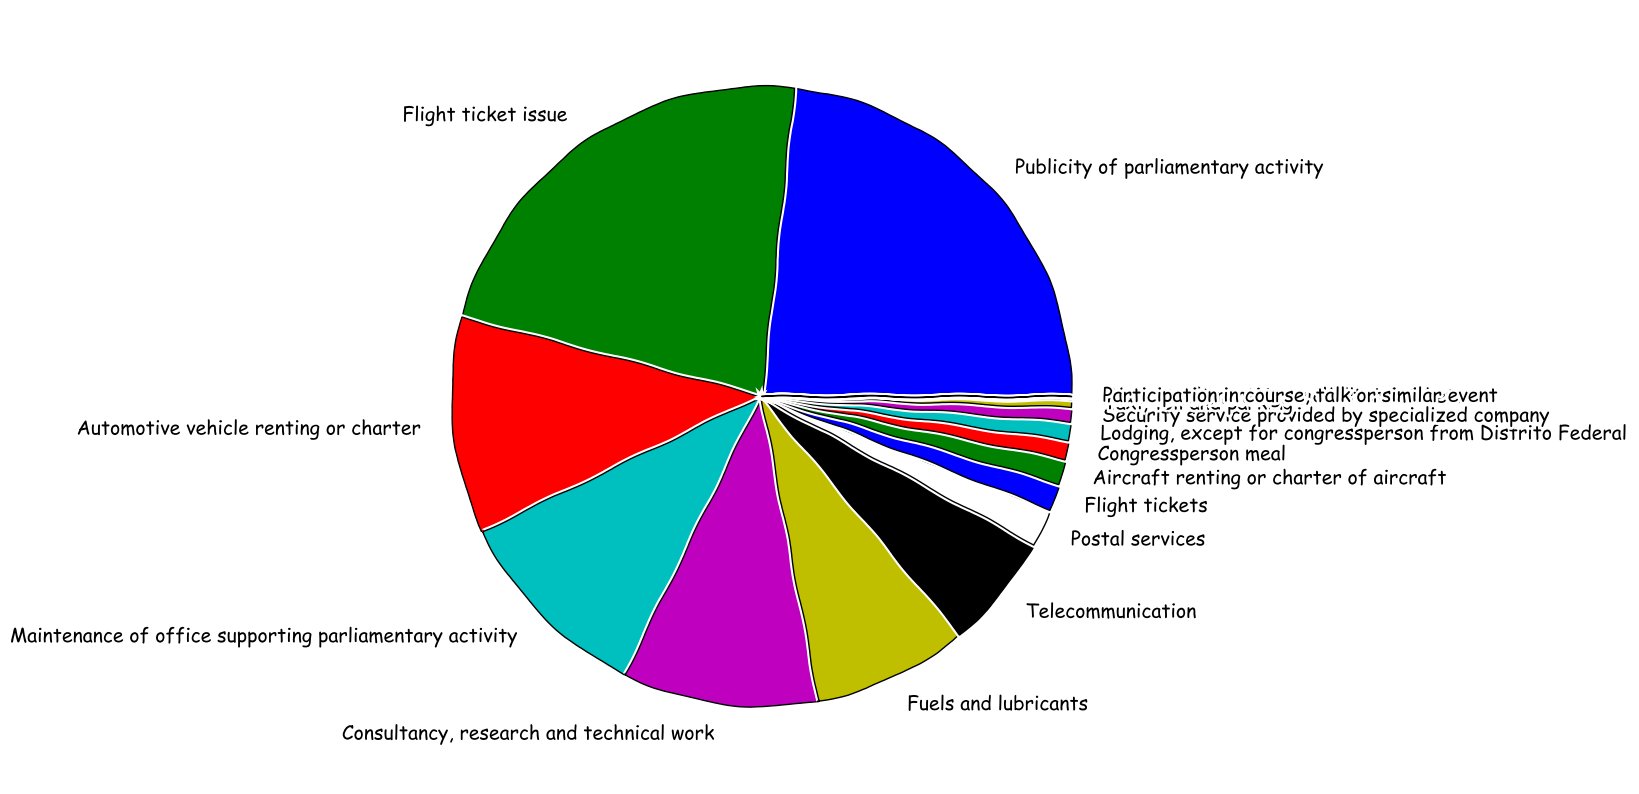

In [36]:
tot = data.groupby(['subquota_number', 'subquota_description'], as_index=False)\
   .agg({'net_value': np.nansum})\
   .sort_values(by='net_value', ascending=False)

plt.xkcd()
plt.figure(figsize=(10,10))
plt.pie(tot.net_value, labels=tot.subquota_description)
plt.show()

In [5]:
data.groupby(['cnpj_cpf', 'supplier'
             ], as_index=False)\
   .agg({'net_value': np.nansum})\
   .sort_values(by='net_value', ascending=False)[0:20]

,cnpj_cpf,supplier,net_value
1463,02012862000160,Cia Aérea - TAM,9054152.71
6135,07575651000159,Cia Aérea - GOL,6027528.23
7599,09296295000160,Cia Aérea - AZUL,2618224.12
2047,02575829000148,Cia Aérea - AVIANCA,2457946.08
12927,22005529000130,DOUGLAS CUNHA DA SILVA ME,1079000.07
1981,02558157000162,TELEFÔNICA BRASIL S.A.,865351.79
9763,13230334000101,InCine Video Ltda - ME,681120.00
10637,15193908000136,JOSELY FERNANDA DO NASCIMENTO,354500.00
448,00512777000135,Cia Aérea - PASSAREDO,325331.40
1465,02012862000160,Tam Linhas Aéreas,292437.28


In [6]:
data.groupby(['subquota_group_id', 'subquota_group_description'], as_index=False)\
   .agg({'net_value': np.nansum})\
   .sort_values(by='net_value', ascending=False)[0:10]

,subquota_group_id,subquota_group_description,net_value
0,1,Veículos Automotores,10275101.75
2,3,Aeronaves,185198.10
3,4,Sem especificações,41510.71
1,2,Embarcações,10064.09


In [7]:
data.groupby(['year', 'month'], as_index=False)\
   .agg({'net_value': np.nansum})\
   .sort_values(by='month', ascending=True)[0:15]


,year,month,net_value
0,2016,1,13348958.18
1,2016,2,17082378.10
2,2016,3,20392221.95
3,2016,4,18020897.15
4,2016,5,19327572.36
5,2016,6,14790020.10
6,2016,7,5683366.54
7,2016,8,443278.36


In [6]:
print('Type of receipt — 0 (zero) for bill of sale; 1 (one) for simple receipt; and 2 (two) to expense made abroad.')
data.groupby(['document_type'], as_index=False)\
   .agg({'net_value': np.nansum})\
   .sort_values(by='net_value', ascending=False).head()

Type of receipt — 0 (zero) for bill of sale; 1 (one) for simple receipt; and 2 (two) to expense made abroad.


,document_type,net_value
0,0,89508874.96
1,1,19311394.52
2,2,200816.38
3,3,67606.88
